# Computer Vision I (922 U0610) - Homework 2
Author: alanhc

ID: r10944007

Date: 9/30

## README
0. create env: `conda env create -f environment.yml`
1. enter env: `conda activate ntu-cv`
2. run jupyter `jupyter notebook`

- Write a program to generate:
    - (a) a binary image (threshold at 128)
    - (b) a histogram
    - (c) connected components(regions with + at centroid, bounding box)


image shape: (512, 512)


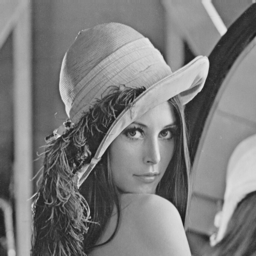

In [1]:
from PIL import Image
import numpy as np

# Todo: 讀檔，確定影像大小
img = Image.open("input/lena.bmp")
img = np.array(img)
h, w = img.shape
print("image shape:", img.shape)
show = Image.fromarray(img).resize((256,256))
show

## (a) - a binary image (threshold at 128)

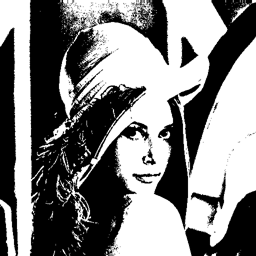

In [2]:
# Todo: 建立一個128的閥值
# Algorithm:
## 1. pixel >= 128 set to 255 else set to 0

img_threshold = np.zeros((h,w), dtype="uint8")
for y in range(h):
    for x in range(w):
        img_threshold[y][x] = (255 if img[y][x]>=128 else 0) # 1.
show = Image.fromarray(img_threshold).resize((256,256))
show.save("output/1_lena_binary.png")
show

## (b) - a histogram

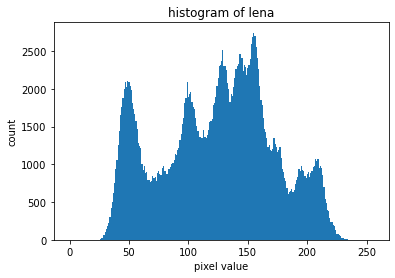

In [3]:
# Todo: 建立histogram
# Algorithm:
## 1. 計算value的count
## 2. 畫圖，縱軸為次數，橫軸為pixel值

# 1.
count = np.zeros(256, dtype="int")
for y in range(h):
    for x in range(w):
        count[ img[y][x] ]+=1
# 2. 
import matplotlib.pyplot as plt
plt.bar(range(256), count, width=1)
plt.title("histogram of lena")
plt.xlabel("pixel value")
plt.ylabel("count")
plt.savefig("output/2_lena_histogram.png")

## (c) - connected components(regions with + at centroid, bounding box)

512 512


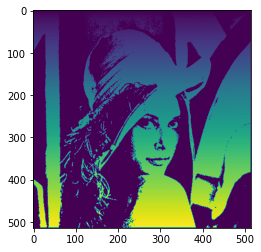

In [4]:
# Todo: connected components (iterative)
# Algorithm:
## 1. inital unique value
## 2. iteration of top-down by bottom-up pass until to change 
## 3. draw bbox 

## 1. inital unique value
h, w = img_threshold.shape
img_ccl = np.zeros((h+2,w+2)) #+2是因為 周圍留0，之後取最小值比較好做
label=1
for y in range(h):
    for x in range(w):
        if (img_threshold[y][x]>0):
            img_ccl[y+1][x+1] = label
            label+=1
print(h,w)
plt.imshow(img_ccl)

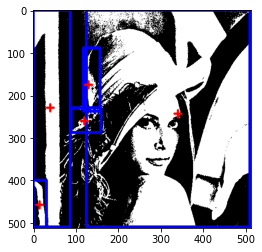

In [7]:
## 2. iteration of top-down by bottom-up pass until to change 
change = False
i=0

while True:
    change = False
    if i%2==0: #top-down
        start_y, end_y, d = 1, h-1, 1   
        start_x, end_x, d = 1, h-1, 1 
    else: #bottom-up
        start_y, end_y, d = h-2, 0, -1 
        start_x, end_x, d = h-2, 0, -1  
    _min = np.zeros(img_ccl.shape)
    for y in range(start_y, end_y, d):
        for x in range(start_x, end_x, d):
            # find min
            window_min = 1e9
            for w_y in range(y-1, y+2):
                for w_x in range(x-1, x+2):
                    if img_ccl[ w_y ][ w_x ] < window_min and img_ccl[ w_y ][ w_x ]!=0:
                        window_min = img_ccl[ w_y ][ w_x ]
            # 填區域最小
            if window_min!= img_ccl[y][x] and img_ccl[y][x]!=0:
                img_ccl[y][x] = window_min
                change = True
    i+=1
    if not change:
        break
# 過濾小於 500次數的pixel，並畫出bbox
img_ccl = img_ccl.astype(int)
ct = np.zeros(h*w)
pos = []
for i in range(h*w):
    pos.append([])

# 統計並計算每個component的座標
for y in range(h):
    for x in range(w):
        ct[ img_ccl[y+1][x+1] ] += 1
        pos[ img_ccl[y+1][x+1] ].append([y,x])
## 3. draw bbox 
import cv2
show = cv2.cvtColor(img_threshold, cv2.COLOR_GRAY2RGB)
for _ct in ct[ ct > 500 ][1:]:
    idxs = np.where(ct == _ct)[0]
    for idx in idxs:
        #左上座標即為x,y最小
        start_point = [ int(np.array(pos[idx])[:,1].min()), int(np.array(pos[idx])[:,0].min()) ] 
        end_point = [ int(np.array(pos[idx])[:,1].max()), int(np.array(pos[idx])[:,0].max()) ] 
        #右下座標即為x,y最小
        centroid = [int(np.array(pos[idx])[:,1].mean())-15, int(np.array(pos[idx])[:,0].mean())+10] 
        #重心即為x,y的平均（mean)，15, 10為使十字置中的bias
       
        show = cv2.rectangle(show, start_point, end_point, [0,0,255], 5)
        show = cv2.putText(show, '+', centroid, cv2.FONT_HERSHEY_SIMPLEX, 
                   1, [255,0,0], 3, cv2.LINE_AA)
plt.imshow(show)
plt.savefig("output/3_lena_ccl.png")

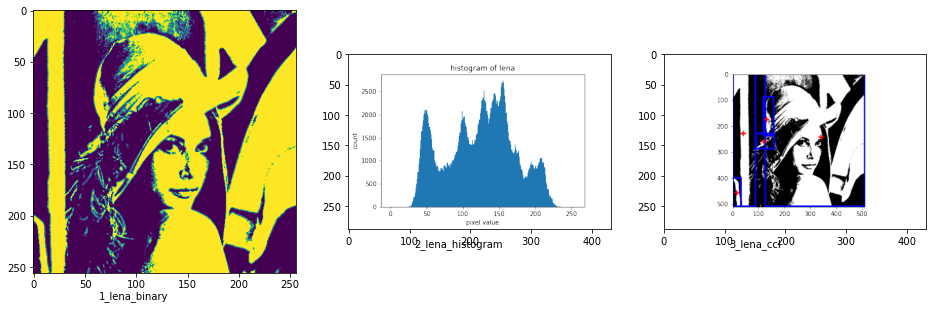

In [6]:
import matplotlib.pyplot as plt
filenames = ["1_lena_binary", "2_lena_histogram", "3_lena_ccl"]
plt.figure(figsize=(16,16))
for i in range(len(filenames)):
    p = plt.subplot(1, len(filenames), i+1)
    plt.imshow( Image.open("output/"+filenames[i]+".png") )
    plt.text(0.25, -0.1, filenames[i],  transform=p.transAxes)